**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span>Python assignement S4 Regression
## DMS - Regression Assignment (v1.1)
Author: Pim de Groot<br>
Student number: 647945<br>
Date: 20 mei 2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:)
* numpy
* pandas
* matplotlib
* sklearn
* seaborn
* statsmodels

From these we will need the following libraries:

In [2]:
# Import
import os

try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    %pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')

try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    %pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
    
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    %pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported') 

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    %pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    

try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    %pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
seaborn already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported


# 1. The Data
We are going to use the datafile Life Expectancy Data.csv. This contains data from the GHO data repository under WHO, which keeps track of the health status for all countries. 

In [3]:
# Read the file
dataset = pd.read_csv('files/Life Expectancy Data.csv', low_memory=False)


Here's a quick look at the data:

In [4]:
# Display first few rows of the dataset
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<AxesSubplot:>

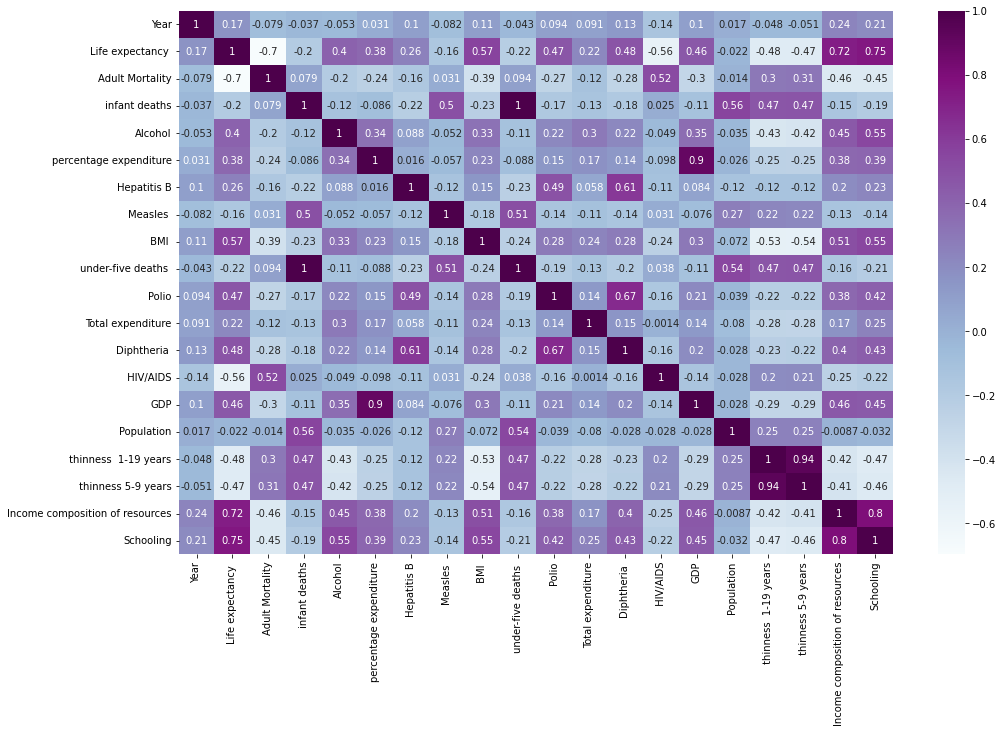

In [5]:
# To show the heatmap inline
%matplotlib inline

plt.rcParams['figure.figsize']= (16,10)
cor=dataset.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap="BuPu")

For picking the variables for this assignment i used a heatmap to find strong correlations.

The variables i am going to use are for:
* Y = Schooling
* X = Life expectancy & income composition of resources

To give a better visualisation understanding i will explain the values below. 

Schooling is the amout of years a person went to school. 
Life expectancy is the expected age of a person. 
Income composition of resources is the HDI (Human Development Index) in terms of income composition of resources (index ranging from 0 to 1). 

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting <span>Schooling</span> using <span >the variable Life expectancy</span>. Below a visualisation of these two:

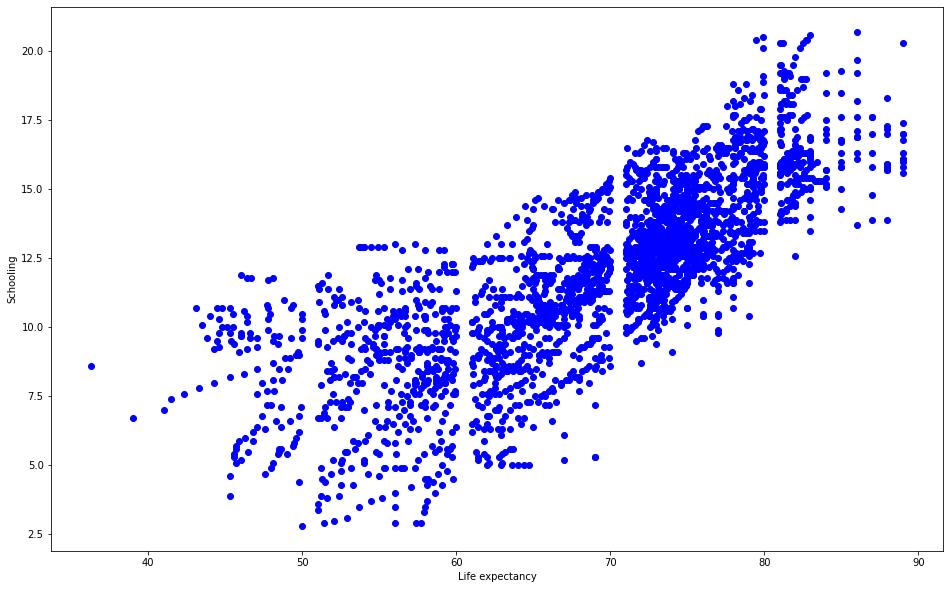

In [6]:
# To show the scatterplot inline
%matplotlib inline
plt.rcParams['figure.figsize']= (16,10)

# Clean the date / remove everything with the value NaN
dataset = dataset[["Life expectancy ","Income composition of resources", "Schooling"]].dropna()

# Remove the 0 values of Schooling to improve
dataset = dataset[dataset['Schooling'] != 0]

# Retrieve data from dataset
x = dataset['Life expectancy ']
y = dataset['Schooling']

# Show scatterplot
plt.xlabel("Life expectancy")
plt.ylabel("Schooling")

plt.scatter(x, y, c='Blue')
plt.show()


As can be seen from the scatterplot there seems to be a clear correlation between the life expectancy and the schooling. 

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of life expectancy.

In [7]:
# Code to create training and testing data
# Start with importing sklearn 
from sklearn.model_selection import train_test_split

In [8]:
# Convert datafile into Numpy array
arr = dataset.to_numpy()

# Reshape values
xRes = arr[:,0].reshape((-1,1))
yRes = arr[:,2].reshape((-1,1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)


Now setup the linear regression model and fit our training data:

In [9]:
# Create linear regression model and fit it with the training data
model = LinearRegression().fit(X_train, y_train)

# Make prediction using X_test
myPrediction = model.predict(X_test)

Lets see how well the model performed with the training data, by visualisation:

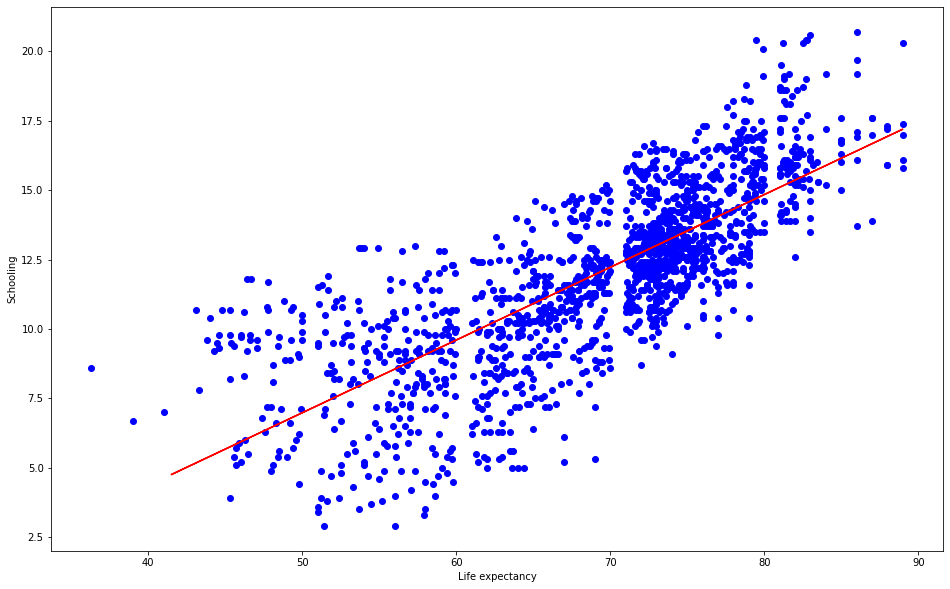

In [10]:
# To show the scatterplot inline
%matplotlib inline
plt.rcParams['figure.figsize']= (16,10)

# Show scatterplot with regression line
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_test, myPrediction, c='red')

plt.xlabel("Life expectancy")
plt.ylabel("Schooling")

plt.show()

<span style='background:yellow'>\<describe how well the line describes the data></span>

Besides from a visual, we can also use some metrics.

In [11]:
# Statsmodels.api summary
x = dataset["Life expectancy "]
x = sm.add_constant(x)
y = dataset["Schooling"]

statsmodel = sm.OLS(y,x).fit()
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Schooling   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4356.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        18:40:24   Log-Likelihood:                -5732.2
No. Observations:                2742   AIC:                         1.147e+04
Df Residuals:                    2740   BIC:                         1.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.2474      0.281    -22.258      0.000      -6.798      -5.697
Life expectancy      0.2645      0.004     66.004      0.000       0.257       0.272
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                5.341
Skew:                          -0.012   Prob(JB):                       0.0692
Kurtosis:                       3.215   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>\<explain in your own words what the R-squared means and indicates, and the two numbers in the column of coef></span>

We can also check how well our model worked by using the testing data:

In [12]:
#code to show the accuracy score
model.score(X_test, y_test)

0.6313115633316821

The number represent the coefficient of determination of the prediction

Now we repeat all these steps, but using the other x-variable: Income composition of resources.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict schooling. based on Income composition of resources

Below a visualisation of these two:

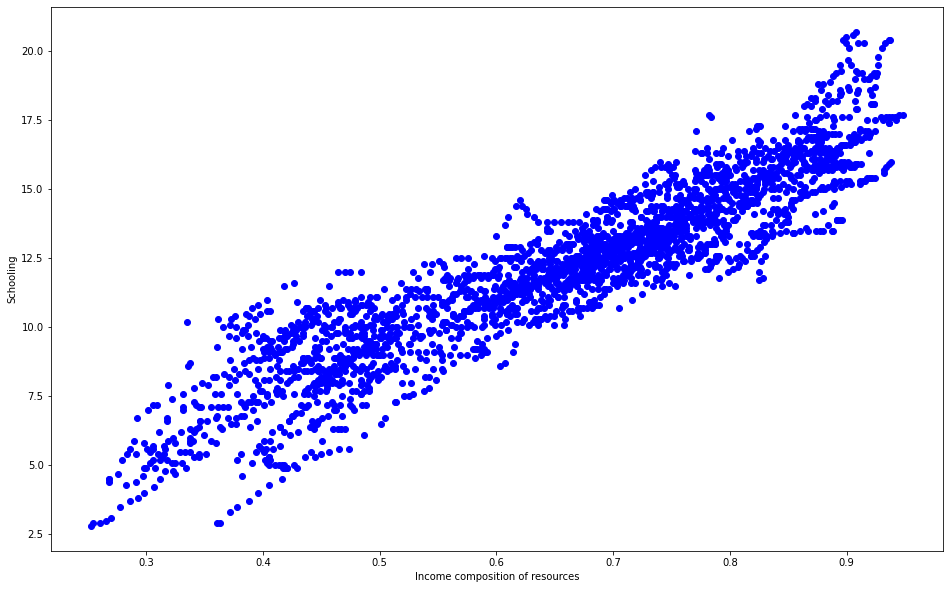

In [13]:
# To show the scatterplot inline
%matplotlib inline
plt.rcParams['figure.figsize']= (16,10)

# Remove the 0 values of Income compostion of resources to improve the model score
dataset = dataset[dataset['Income composition of resources'] != 0]

# Retrieve data from dataset
x = dataset['Income composition of resources']
y = dataset['Schooling']


# x.drop(x.loc[x['Income composition of resources']==0].index, inplace=True)

# Show scatterplot
plt.xlabel("Income composition of resources")
plt.ylabel("Schooling")

plt.scatter(x, y, c='Blue')
plt.show()

As can be seen from the scatterplot there seems to be a clear correlation income composition of resources and the schooling.

Creating again the training/testing sets and the model itself:

In [14]:
# Convert datafile into Numpy array
arr = dataset.to_numpy()

# Reshape values
xRes = arr[:,1].reshape((-1,1))
yRes = arr[:,2].reshape((-1,1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

# Create linear regression model and fit it with the training data
model = LinearRegression().fit(X_train, y_train)

# Make prediction using X_test
myPrediction = model.predict(X_test)

Now lets see how this performs:

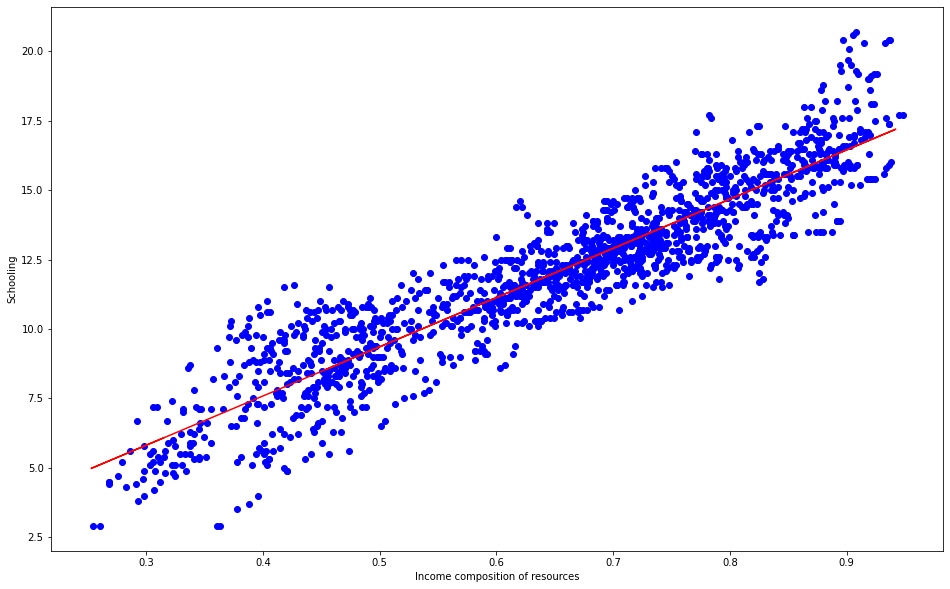

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Schooling   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.452e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        18:40:25   Log-Likelihood:                -4275.4
No. Observations:                2638   AIC:                             8555.
Df Residuals:                    2636   BIC:                             8567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5407      0.100      5.430      0.000       0.345       0.736
Income composition of resources    17.6976      0.147    120.508      0.000      17.410      17.986
==============================================================================
Omnibus:                        9.177   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.278
Skew:                           0.084   Prob(JB):                      0.00586
Kurtosis:                       3.256   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# To show the scatterplot inline
%matplotlib inline
plt.rcParams['figure.figsize']= (16,10)

# Show scatterplot with regression line
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_test, myPrediction, c='red')

plt.xlabel("Income composition of resources")
plt.ylabel("Schooling")

plt.show()

# Statsmodels.api summary
x = dataset["Income composition of resources"]
x = sm.add_constant(x)
y = dataset["Schooling"]

statsmodel = sm.OLS(y,x).fit()
statsmodel.summary()

<span style='background:yellow'>\<describe the outcome as before, and now also compare the results with the results of section 2.1.></span>

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict schooling based on income composition of resources and life expectancy separately. In this chapter we are going to look if we can make an even better prediction if we try to predict schooling based on BOTH of these together.

We begin with combining the two x's into one X:

In [16]:
#add code here to add the two x's into one
# Read the file
dataset = pd.read_csv('files/Life Expectancy Data.csv', low_memory=False)

# Clean the date / remove everything with the value NaN
dataset = dataset[["Life expectancy ","Income composition of resources", "Schooling"]].dropna()

# Remove the 0 values of Schooling to improve the model score
dataset = dataset[dataset['Schooling'] != 0]
dataset = dataset[dataset['Income composition of resources'] != 0]

x = dataset[["Life expectancy ","Income composition of resources"]]
y = dataset['Schooling']

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [17]:
#code to split the data, and create & fit the model:

# Start with importing sklearn 
from sklearn.model_selection import train_test_split

# Convert datafile into Numpy array
arr = dataset.to_numpy()

# Reshape values
life_Expectancy = arr[:,0].reshape((-1,1))
income = arr[:,1].reshape((-1,1))
yRes = arr[:,2].reshape((-1,1))

# Put x values in multiX
multiX=np.hstack((life_Expectancy,income))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(multiX, yRes, test_size=0.4, random_state=101)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

# Create linear regression model and fit it with the training data
model = LinearRegression().fit(X_train, y_train)

# Make prediction using X_test
myPrediction = model.predict(X_test)

A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [29]:
#Accuracy score
from sklearn.metrics import accuracy_score

life_Expectancy = arr[:,0].reshape((-1,1))
income = arr[:,1].reshape((-1,1))
schooling = arr[:,2].reshape((-1,1))

multiX=np.hstack((life_Expectancy,income))

multiModel = LinearRegression().fit(multiX, schooling)
yPred = multiModel.predict(multiX)
det=metrics.r2_score(schooling,yPred)

adjDet=1-(1-det)*(schooling.shape[0]-1)/(schooling.shape[0]-multiX.shape[1]-1)

print(f"Accuracy score: {adjDet}")

# Statsmodels.api summary
newX=sm.add_constant(multiX) #add the constant
newModel=sm.OLS(schooling,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

# 3d visualisation in next cell

Accuracy score: 0.8532642539441055


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     7668.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:02:07   Log-Likelihood:                -4213.8
No. Observations:                2638   AIC:                             8434.
Df Residuals:                    2635   BIC:                             8451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7383      0.219     12.521      0.000       2.310       3.167
x1            -0.0611      0.005    -11.221      0.000      -0.072      -0.050
x2            20.8169      0.313     66.540      0.000      20.203      21.430
==============================================================================
Omnibus:                       10.082   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.840
Skew:                           0.026   Prob(JB):                      0.00163
Kurtosis:                       3.338   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# To show the scatterplot as interactive 3d graph
%matplotlib 
plt.rcParams['figure.figsize']= (16,10)

# Make 3d scatterplot
ax = plt.axes(projection="3d")
ax.scatter(life_Expectancy,income,schooling)

# Add labels and title
ax.set_title("Visualisation")
ax.set_xlabel("Life expectancy")
ax.set_ylabel("Income composition of resources")
ax.set_zlabel("School years")

plt.show()

Using matplotlib backend: TkAgg


Instead of looking at the R-square, we should be looking at the adjusted R-square. 

The adjusted R square adjusts the R square for the number of predictors used, R square does not have this feature. So when using a model with more predictors we should look to the adjusted R square for more accurate R square. 

We also see more rows now in the 'coef' column. This is because we added an extra x variable (2 in total) to the model.

This model performed better than the other models in chapter 2. The model with x variable life expectation got lower outcome at R squared = 0.614. The model with x variable income composition of resources got around the same outcome at R squared = 0.846 to a R squared = 0.853 with both the x variables. 

Altho with this model can be questioned that the VIF's are to high and should be changed. 

A last thing to do would be to check the VIF's:

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

[88.20250690945598, 4.753042823581939, 4.753042823581939]

In the results we are looking for the VIF's that are lower then 10. VIF's higher then 10 can be bad for the model. By causing multicollinearity.

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict Schooling by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [21]:
#add code to create an X variable using all variables, except of course your y variable:

# Read the filesssss
dataset = pd.read_csv('files/Life Expectancy Data.csv', low_memory=False)
dataset = dataset.dropna()

# Retrieve data from dataset
X = dataset[["Year","Life expectancy " ,"Adult Mortality","infant deaths","Alcohol",
            "percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio",
            "Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years",
            " thinness 5-9 years","Income composition of resources"]]

y = dataset['Schooling']

# # Convert datafile into Numpy array
# arr = dataset.to_numpy()

# # Reshape values
# xRes = arr[:,1].reshape((-1,1))
# yRes = arr[:,2].reshape((-1,1))




We could first have a quick look at the results of this model:

In [22]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:

# Import sklearn and make train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Fit the model
myModel=LinearRegression().fit(X_train,y_train)

# Statsmodels.api summary
newX=sm.add_constant(X) #add the constant
newModel=sm.OLS(y,newX).fit()
newPred=newModel.predict(newX)
print(newModel.summary())

# Accuracy score
multiModel = LinearRegression().fit(newX, y)
yPred = multiModel.predict(newX)
det=metrics.r2_score(y,yPred)

adjDet=1-(1-det)*(y.shape[0]-1)/(y.shape[0]-newX.shape[1]-1)

print(f"Accuracy score: {adjDet}")

                            OLS Regression Results                            
Dep. Variable:              Schooling   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     261.5
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        18:40:27   Log-Likelihood:                -2881.3
No. Observations:                1649   AIC:                             5803.
Df Residuals:                    1629   BIC:                             5911.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

However we have to be careful with those VIF's. So lets see:

In [23]:
#add code here to show the VIF's.
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]


[281096.7652031738,
 1.161344962105554,
 5.389112190809684,
 2.143610064444442,
 222.62978650560692,
 1.879246183635095,
 12.87855206340482,
 1.6805447608737647,
 1.517440122815812,
 1.7983680877073556,
 212.9162331464037,
 1.714640282572865,
 1.1260632276914093,
 2.1011094561528405,
 1.9993260915674862,
 13.598142909913271,
 1.93483242406229,
 7.5839875855019185,
 7.571688007261675,
 2.969882939837145]

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [24]:
#add your function code here.
def removeVIF(newX):
    vifs = [variance_inflation_factor(newX, j) for j in range(newX.shape[1])]
    del vifs[0]
    heighest_vif = 0

    
    # Get heighest vif
    for vif in vifs:
        if vif > heighest_vif:
            heighest_vif = vif
            index = vifs.index(vif) + 1
    
    # Check if heighest vif is greater than 10
    if heighest_vif > 10:

        # Remove from vifs and x variables
        vifs.remove(heighest_vif)
        newX = newX.drop(newX.columns[index], axis = 1)
        return True, newX
    else: 
        return False, newX      

Lets run the function, and then use the result to create a new model:

In [ ]:
#add code here that runs the just made function, and uses the result for the new model:

# Run functions ones
res, newVif = removeVIF(newX)

# If vif values is above 10             
while res == True: 
    res, newVif = removeVIF(newVif)

# Show the new vif list
[variance_inflation_factor(newVif, j) for j in range(newVif.shape[1])]

# Statsmodels.api summary
newModel=sm.OLS(y,newVif).fit()
newPred=newModel.predict(newVif)

We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

<h2> Next bit of code takes around 11 to 15 minutes </h2>

In [ ]:
# Next bit of code takes around 11 to 15 minutes
from itertools import combinations
df = pd.DataFrame(dataset, columns = ["Year","Life expectancy " ,"Adult Mortality","Alcohol",
            "percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio",
            "Total expenditure","Diphtheria "," HIV/AIDS","Population"," thinness  1-19 years",
            " thinness 5-9 years","Income composition of resources", "Schooling"])

# Define variables
cols = [x for x in df.columns if x != 'Schooling']
Y = df['Schooling']

# Result dictionary
fit_d = {}

# Loop for any length of combinations
for i in range(1, len(cols)+1):
    # Loop for any length of combinations with length i
    for comb in combinations(cols, i):
        # Define X from the combination
        X = df[list(comb)]
        
        # Fit model
        X = sm.add_constant(X)
        model = sm.OLS(Y,X).fit()

        # Save adj. R. Squared
        fit_d[comb] = model.rsquared_adj

# Find highest adj R value
key_max = max(fit_d, key=fit_d.get)

print(f'Best variables {key_max} for a R-value of {round(fit_d[key_max], 5)}')


Finally lets see how this new model performs:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:

# Statsmodels.api summary
X = df[list(key_max)]

X = sm.add_constant(X)
newModel=sm.OLS(y,X).fit()
newPred=newModel.predict(X)
print(newModel.summary())

# Accuracy score
multiModel = LinearRegression().fit(X, y)
yPred = multiModel.predict(X)
det=metrics.r2_score(y,yPred)

adjDet=1-(1-det)*(y.shape[0]-1)/(y.shape[0]-X.shape[1]-1)

print(f"Accuracy score: {adjDet}")

<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Update with your data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])
KF = KFold(n_splits=5)
for train_index, test_index in KF.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [ ]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----